In [68]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import requests
from pathlib import Path
import torchmetrics
from torchmetrics import Accuracy
from sklearn.datasets import make_moons

torch.__version__

'2.6.0+cpu'

## **Neural Network classification with PyTorch**

### **Prepare the dataset**

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}\n")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y: [1 1 1 1 0]


In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
# Make a DataFrame of circle data
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1],
                        "label": y
                        })

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
print(circles.label.value_counts())
print(f"\nWe have a balanced dataset")

label
1    500
0    500
Name: count, dtype: int64

We have a balanced dataset


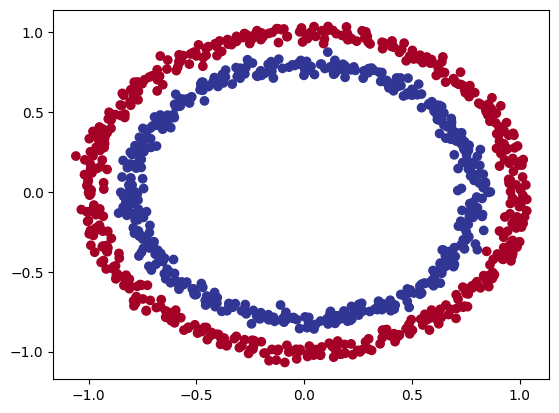

In [7]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu) # cmap stand for color map, RdYlBu stands for Red Yellow Blue

### **Check input and output shapes**

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Valies for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### **Turn data into tensors and create train and test splits**

In [11]:
print(f"X is a: {type(X)} with datatype: {X.dtype}")
print(f"y is a: {type(y)} with datatype: {y.dtype}")

X is a: <class 'numpy.ndarray'> with datatype: float64
y is a: <class 'numpy.ndarray'> with datatype: int64


In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32) # Without type(torch.float32) it will be a tensor with dype: float64
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
print(f"X is a: {type(X)} with datatype: {X.dtype}")
print(f"y is a: {type(y)} with datatype: {y.dtype}")

X is a: <class 'torch.Tensor'> with datatype: torch.float32
y is a: <class 'torch.Tensor'> with datatype: torch.float32


In [14]:
# Split data into training and test sets
# We can use train_test_split with PyTorch tensors as long as they are connected with a CPU
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42 # Similar to random seed, it's for reproducibiliy
                                                    )

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### **Building a model**

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accellator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [16]:
# 1. Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [17]:
# 2. Construct a model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # Generally out_features is a multiple of 8
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # First layer's out_features and Second layer's in_features must match 

    # Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2

# Instantiate an instance of out model class and send it to the target device
model_0 = CircleModelV0().to(device)

In [18]:
next(model_0.parameters()).device

device(type='cpu')

In [19]:
# Let's replicate the model above using nn.Sequential()
# Sequential() implements most of the code for us behind the scene
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2535, -0.1260],
                      [ 0.4529,  0.3851],
                      [-0.6266,  0.4335],
                      [ 0.6828,  0.4541],
                      [ 0.1993, -0.5509]])),
             ('0.bias', tensor([-0.4866, -0.6524, -0.4257, -0.4224, -0.3224])),
             ('1.weight',
              tensor([[ 0.1856, -0.3112,  0.3148, -0.3273, -0.0787]])),
             ('1.bias', tensor([-0.3555]))])

In [21]:
# Make predictions with the untrained model
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Spape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Spape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n {y_test}")

Length of predictions: 200, Spape: torch.Size([200, 1])
Length of test samples: 200, Spape: torch.Size([200, 2])

First 10 predictions:
 tensor([[-0.0553],
        [-0.3303],
        [ 0.2609],
        [-0.1433],
        [-0.3811],
        [-0.5439],
        [-0.8092],
        [-0.8609],
        [ 0.2875],
        [-0.3558]])

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0

Which loss function or optimizer should you use?

This is problem specific:
* For regression you might want MAE (Mean Absolute Error) or MSE (Mean Square Error)
* For classification you might want Binary Cross Entropy or Categorical Cross Entropy

And for optimizer, two of the most common and useful are:
* SGD 
* Adam 

However PyTorch has many built-in options.

In [22]:
# 3. Setup loss function: we are going to use 'torch.nn.BECWithLogitsLoss' (Binary Cross Entropy)
#loss_fn = nn.BCELoss() # BCELoss requires input to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss has the sigmoid activation function built-in and it is numerically stable

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [23]:
# Calculate accuracy
def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

**Going from raw logits -> prediction probabilities -> prediction labels**

Our model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [24]:
# View the first 5 outputs of the forward psdd on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

print(f"y_logits: {y_logits}\n")
print(f"y_test: {y_test[:5]}\n")
print(f"y_logits and y_test have not the same format!")

y_logits: tensor([[-0.0553],
        [-0.3303],
        [ 0.2609],
        [-0.1433],
        [-0.3811]])

y_test: tensor([1., 0., 1., 0., 1.])

y_logits and y_test have not the same format!


In [25]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4862],
        [0.4182],
        [0.5649],
        [0.4642],
        [0.4059]])

For our prediction probability values, we need to perform a range-style rounding on the:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [26]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for quality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze(), y_pred_labels.squeeze()

tensor([True, True, True, True, True])


(tensor([0., 0., 1., 0., 0.]),
 tensor([0., 0., 1., 0., 0.], grad_fn=<SqueezeBackward0>))

In [27]:
# 4. Train model
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, # BCEWithLogitsLoss expects raw logits as input...
                   y_train   # ... and the training's label
                   )
    acc = accuracy_function(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss/acc
        test_loss = loss_fn(test_logits, # Fist: predictions
                            y_test       # Second: true labels... the order matters!
                            )
        test_acc = accuracy_function(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        

Epoch: 0, | Loss: 0.72081, Acc: 48.00% | Test loss: 0.70966, Test acc: 50.50%
Epoch: 10, | Loss: 0.71266, Acc: 48.62% | Test loss: 0.70293, Test acc: 51.00%
Epoch: 20, | Loss: 0.70777, Acc: 48.88% | Test loss: 0.69922, Test acc: 51.50%
Epoch: 30, | Loss: 0.70448, Acc: 48.88% | Test loss: 0.69695, Test acc: 51.00%
Epoch: 40, | Loss: 0.70211, Acc: 48.88% | Test loss: 0.69547, Test acc: 51.00%
Epoch: 50, | Loss: 0.70032, Acc: 49.00% | Test loss: 0.69447, Test acc: 51.00%
Epoch: 60, | Loss: 0.69895, Acc: 48.88% | Test loss: 0.69379, Test acc: 51.00%
Epoch: 70, | Loss: 0.69787, Acc: 49.00% | Test loss: 0.69333, Test acc: 51.50%
Epoch: 80, | Loss: 0.69700, Acc: 48.88% | Test loss: 0.69301, Test acc: 51.00%
Epoch: 90, | Loss: 0.69631, Acc: 49.00% | Test loss: 0.69281, Test acc: 51.00%


From the metrics it looks like our model is not learning anything.

So to inspect it, let's make some prediction and make them visual.

To do so, we are going to import a function called `plot_decision_boundary()`

In [28]:
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print(f"helper_functions.py is already exists, skipping download")
else:
    print(f"Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py is already exists, skipping download


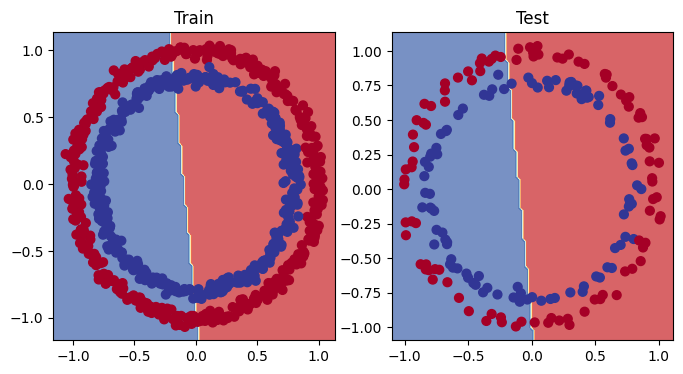

In [29]:
# Plot decision boundary of the model
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

This classification is very poor

### **Improving a model (from a model's perspective)**

* Add more layers - give the model more changes to learn about patterns in the data
* Add more hidden units - same thing as the previous one
* Fit for longer (increment the epochs)
* Changing the activation function
* Change the learning rate
* Change the loss function

This options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layer: 2 -> 3
* Increase the number of epochs: 100 -> 1000 

In [30]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        """z = self.layer_1(x)
        z = self.layer_2(z)
        z = self.layer_3(z)""" # Too long!
        return self.layer_3(self.layer_2(self.layer_1(x))) # This way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [32]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [33]:
# Write a training and evalutation loop for module_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_function(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_function(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0, | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100, | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200, | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300, | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400, | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500, | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600, | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700, | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800, | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900, | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


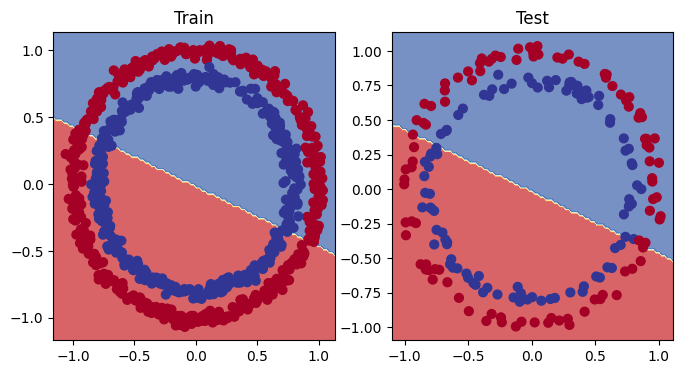

In [34]:
# Plot the decision boundary
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Even this model is not working...

### **Preparing data to see if our model can fit a straight line**

One way to troubleshoot a larger problem is to test out a smaller problem.

In [35]:
# Create some data (as same as 01_PyTorch_Workflow)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [36]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

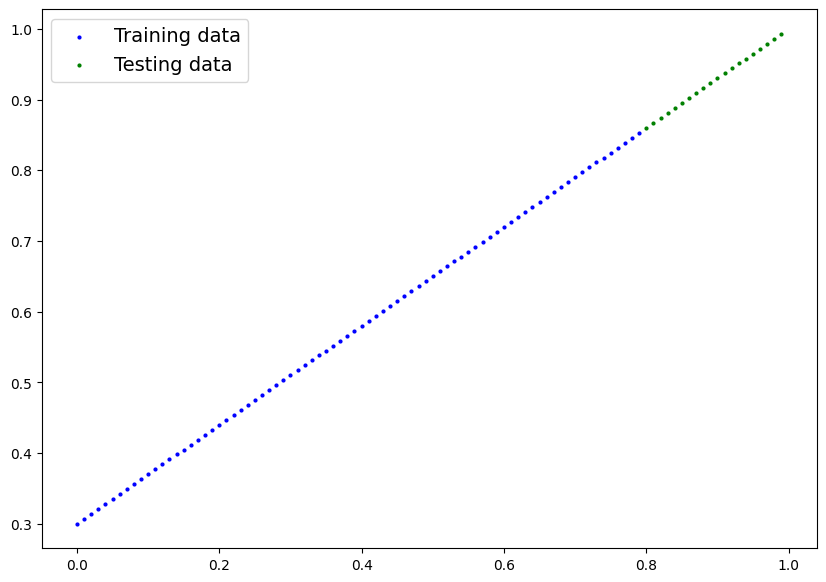

In [37]:
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [38]:
# Adjusting model_1 to fit a straight line
# So we create a model_2 with the same architecture as model_1 (with some changes)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [40]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    # Training
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

# Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0, | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100, | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200, | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300, | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400, | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500, | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600, | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700, | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800, | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900, | Loss: 0.01798 | Test loss: 0.00360


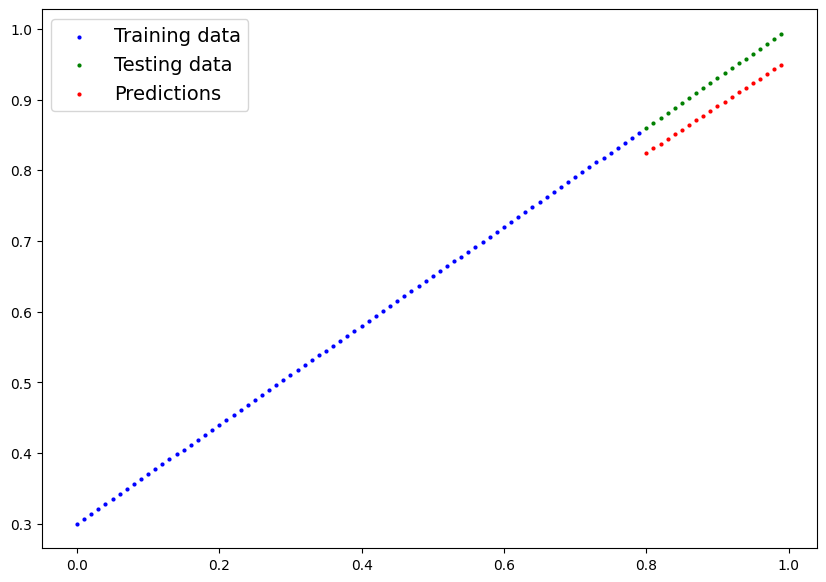

In [41]:
# Turn on evaluation mode
model_2.eval()

# Make prediction (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

### **The missing piece: non-linearity**

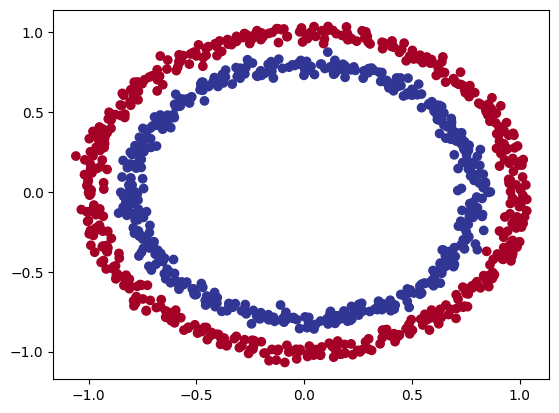

In [42]:
# Recreating non-linear data (red and blue circles)
# Make and plot data
samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [43]:
# Convert data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [44]:
# Building a model with non-linear activation functions
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV3().to(device)
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [46]:
# Train a model with non-linearity
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
    ### Training
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_function(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_function(y_true=y_test, y_pred=test_pred)
    
    # Print out what's happenin
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")
    

Epoch: 0, | Loss: 0.6929, Acc: 50.00% | Test loss: 0.6932, Test acc: 50.00%
Epoch: 100, | Loss: 0.6912, Acc: 52.88% | Test loss: 0.6910, Test acc: 52.50%
Epoch: 200, | Loss: 0.6898, Acc: 53.37% | Test loss: 0.6894, Test acc: 55.00%
Epoch: 300, | Loss: 0.6879, Acc: 53.00% | Test loss: 0.6872, Test acc: 56.00%
Epoch: 400, | Loss: 0.6852, Acc: 52.75% | Test loss: 0.6841, Test acc: 56.50%
Epoch: 500, | Loss: 0.6810, Acc: 52.75% | Test loss: 0.6794, Test acc: 56.50%
Epoch: 600, | Loss: 0.6751, Acc: 54.50% | Test loss: 0.6729, Test acc: 56.00%
Epoch: 700, | Loss: 0.6666, Acc: 58.38% | Test loss: 0.6632, Test acc: 59.00%
Epoch: 800, | Loss: 0.6516, Acc: 64.00% | Test loss: 0.6476, Test acc: 67.50%
Epoch: 900, | Loss: 0.6236, Acc: 74.00% | Test loss: 0.6215, Test acc: 79.00%


In [47]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984])),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01,  5.6581e-02,  5.3486e-01, -1.927

In [48]:
# Make some prediction
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

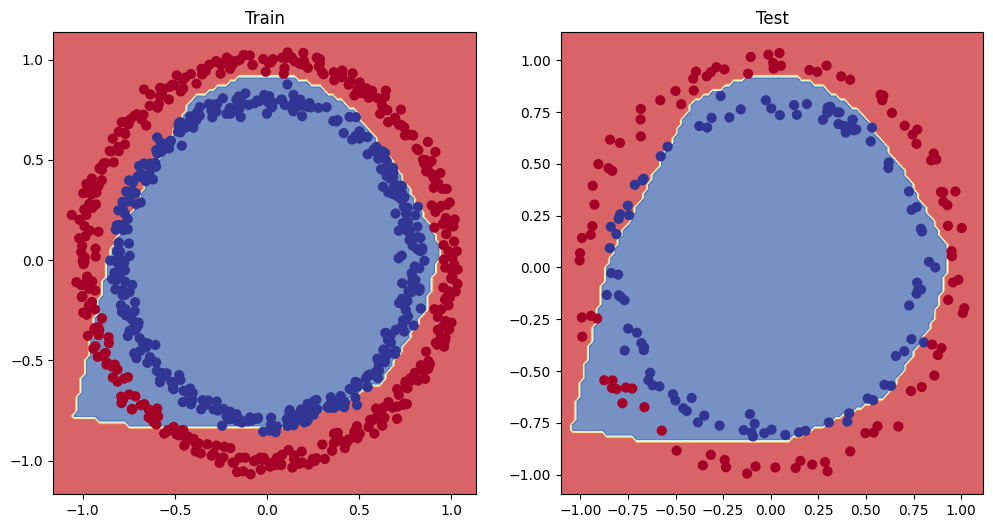

In [49]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### **Putting all together with a multi-class classification problem**

#### **Creating a toy multi-class dataset**

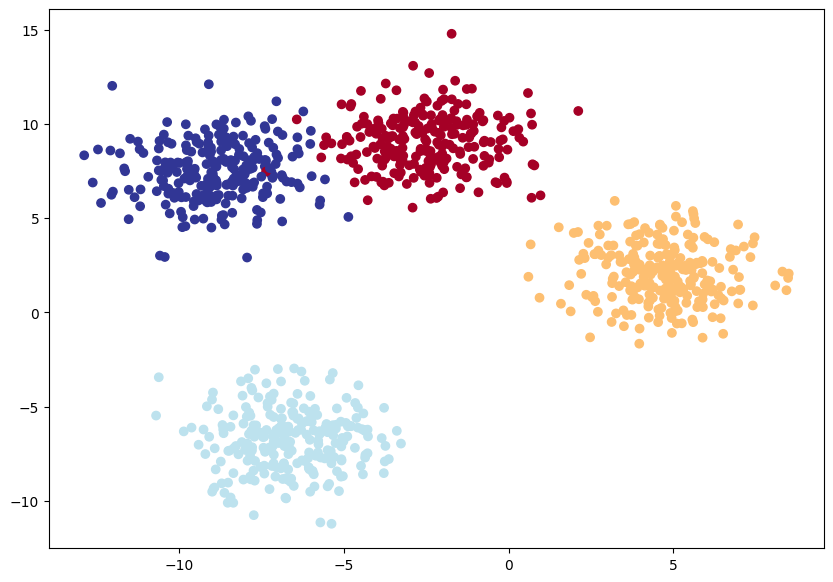

In [50]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES, 
                            centers=NUM_CLASSES, 
                            cluster_std=1.5, # Give the cluster a little shake up
                            random_state=RANDOM_SEED)
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) # The cross-entropy loss needs torch.longTensor for the target
                                                         # (because every index will be a class, so use torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                        y_blob, 
                                                                        test_size=0.2, 
                                                                        random_state=RANDOM_SEED)
# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

#### **Building a multi-class classification model in PyTorch**

In [51]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [52]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model
        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of output features (number of output classes)
            hidden_units (int): Number of hidden units between layer, default 8
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)
    
# Create an instance of BlobModeland send it to the target device
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

#### **Create a loss function and an optimizer for a multi-class classification model**

In [53]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

#### **Getting prediction probabilities for a multi-class PyTorch model**

In order to evaluate, train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probabilities (use `torch.softmax()`) -> Pred labels (take the argmax of the prediction probabilities)

In [54]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [55]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [56]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5]) # logits (raw outputs)
print(y_pred_probs[:5]) # with a non-lineary activation function (softmax)

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [57]:
torch.sum(y_pred_probs[0]) # These are probabilities! (an effect of the softmax function)

tensor(1.)

In [58]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [59]:
# Convert our model's prediction probabilitis to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds, y_blob_test

(tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 1, 0, 1]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3,

#### **Creating a training loop and testing loop for multi-class PyTorch model**

In [60]:
# Fit the multi-class model to the data
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Set number of epochs
epochs = 100

# Put the data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
    ### Training
    model_4.train()
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_function(y_true=y_blob_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_function(y_true=y_blob_test, y_pred=test_preds)
    
    # Print out what's happenin
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0, | Loss: 1.1588, Acc: 40.38% | Test loss: 1.0755, Test acc: 48.00%
Epoch: 10, | Loss: 0.6448, Acc: 96.75% | Test loss: 0.6607, Test acc: 97.50%
Epoch: 20, | Loss: 0.4254, Acc: 98.50% | Test loss: 0.4307, Test acc: 100.00%
Epoch: 30, | Loss: 0.2529, Acc: 99.12% | Test loss: 0.2451, Test acc: 99.50%
Epoch: 40, | Loss: 0.1123, Acc: 99.25% | Test loss: 0.1023, Test acc: 99.50%
Epoch: 50, | Loss: 0.0663, Acc: 99.25% | Test loss: 0.0585, Test acc: 99.50%
Epoch: 60, | Loss: 0.0507, Acc: 99.25% | Test loss: 0.0429, Test acc: 99.50%
Epoch: 70, | Loss: 0.0430, Acc: 99.25% | Test loss: 0.0349, Test acc: 99.50%
Epoch: 80, | Loss: 0.0384, Acc: 99.25% | Test loss: 0.0299, Test acc: 99.50%
Epoch: 90, | Loss: 0.0352, Acc: 99.25% | Test loss: 0.0266, Test acc: 99.50%


#### **Making and evalutating predictions with PyTorch multi-class model**

In [61]:
# Make prediction
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [62]:
# Go from logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]])

In [63]:
# Go from prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

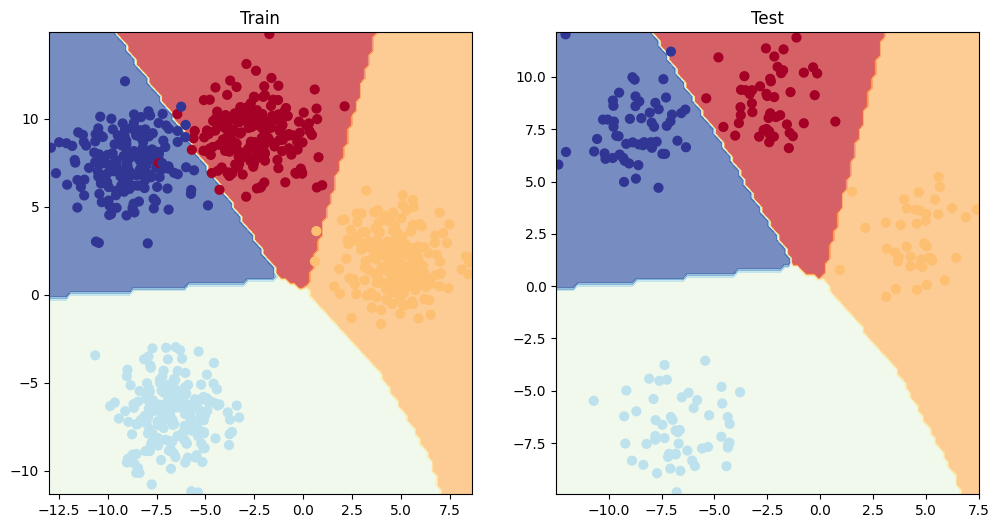

In [64]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### **A few more classification metrics (to evalutate our classification model)**

* Accuracy - out of 100 samples, how many does our models right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (only with scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Torchmetrics: https://lightning.ai/docs/torchmetrics/stable/ is a good library to evaluate a model.

More specifically: https://lightning.ai/docs/torchmetrics/stable/all-metrics.html

In [65]:
# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
print(f"Accuracy: {torchmetric_accuracy(y_preds, y_blob_test)}")

# Calculate precision
torchmetric_precision = torchmetrics.Precision(task="multiclass", num_classes=4).to(device)
print(f"Precision: {torchmetric_precision(y_preds, y_blob_test)}")

# Calculate recall
torchmetric_recall = torchmetrics.Recall(task="multiclass", num_classes=4).to(device)
print(f"Recall: {torchmetric_recall(y_preds, y_blob_test)}")

# Calculcate F1-score
torchmetric_f1_score = torchmetrics.F1Score(task="multiclass", num_classes=4).to(device)
print(f"F1-score: {torchmetric_f1_score(y_preds, y_blob_test)}")

# Calculate confusion matrix
torchmetric_confusion_matrix = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=4).to(device)
print(f"Confusion Matrix: {torchmetric_confusion_matrix(y_preds, y_blob_test)}")

# Calculate classification report
print(f"Classification report:\n {classification_report(y_blob_test, y_preds)}")

Accuracy: 0.9950000047683716
Precision: 0.9950000047683716
Recall: 0.9950000047683716
F1-score: 0.9950000047683716
Confusion Matrix: tensor([[49,  0,  0,  0],
        [ 0, 41,  0,  0],
        [ 0,  0, 53,  0],
        [ 1,  0,  0, 56]])
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        57

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



### **Exercises**

All exercises should be completed using device-agonistic code.

In [67]:
# 1. Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### 1. Make a binary classification dataset with Scikit-Learn's `make_moons()` function.

* For consistency, the dataset should have 1000 samples and a `random_state=42`
* Turn the data into PyTorch tensors. Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [108]:
X, y = make_moons(n_samples=1000, noise=0.07, random_state=42)
X_train_numpy, X_test_numpy, y_train_numpy, y_test_numpy = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = torch.from_numpy(X_train_numpy).type(torch.float32)
X_test = torch.from_numpy(X_test_numpy).type(torch.float32)
y_train = torch.from_numpy(y_train_numpy).type(torch.float32)
y_test = torch.from_numpy(y_test_numpy).type(torch.float32)

print(f"Old types: {type(X_train_numpy), type(X_test_numpy), type(y_train_numpy), type(y_test_numpy)}")
print(f"New types: {type(X_train), type(X_test), type(y_train), type(y_test)}")
print(f"Len X_train: {len(X_train)}, Len y_train: {len(y_train)}")
print(f"Len X_test: {len(X_test)}, Len y_test: {len(y_test)}")

Old types: (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>)
New types: (<class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>, <class 'torch.Tensor'>)
Len X_train: 800, Len y_train: 800
Len X_test: 200, Len y_test: 200


In [109]:
X_train, X.shape

(tensor([[ 2.0144,  0.2466],
         [-1.0187,  0.4045],
         [-0.1252,  1.0580],
         ...,
         [-0.7748,  0.6186],
         [ 1.0494,  0.1170],
         [ 1.9290,  0.1262]]),
 (1000, 2))

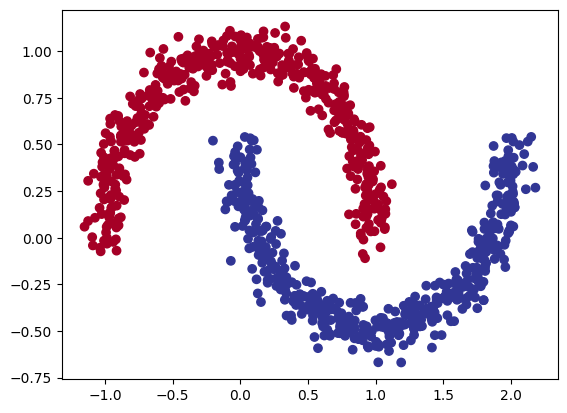

In [110]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu) # cmap stand for color map, RdYlBu stands for Red Yellow Blue

#### 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in exercise 1.

* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [120]:
class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=1)
        )
    
    def forward(self, x):
        return self.layer_stack(x)
    
# Create an instance of BlobModeland send it to the target device
model_exercise = MoonModel().to(device)
model_exercise
        

MoonModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

#### 3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [121]:
# Create a loss function for binary classification
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.Adam(params=model_exercise.parameters(), lr=0.001)

#### 4. Create a training and testing loop to fit the model you created in exercise 2 to the data you created in the exercise 1.

* To measure model accuracy, you can create your own accuracy function or use the accuracy function in `TorchMetrics`.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [122]:
torch.manual_seed(42)

epochs = 500

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_exercise.train()

    # 1. Forward pass
    y_logits = model_exercise(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_function(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_exercise.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_exercise(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_function(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0, | Loss: 0.69697, Acc: 50.00% | Test loss: 0.69524, Test acc: 50.00%
Epoch: 10, | Loss: 0.68294, Acc: 50.00% | Test loss: 0.68261, Test acc: 50.00%
Epoch: 20, | Loss: 0.67021, Acc: 73.50% | Test loss: 0.67124, Test acc: 72.00%
Epoch: 30, | Loss: 0.65537, Acc: 80.00% | Test loss: 0.65772, Test acc: 76.50%
Epoch: 40, | Loss: 0.63511, Acc: 80.00% | Test loss: 0.63896, Test acc: 78.00%
Epoch: 50, | Loss: 0.60826, Acc: 79.75% | Test loss: 0.61420, Test acc: 79.00%
Epoch: 60, | Loss: 0.57481, Acc: 80.38% | Test loss: 0.58290, Test acc: 77.50%
Epoch: 70, | Loss: 0.53446, Acc: 81.12% | Test loss: 0.54482, Test acc: 78.00%
Epoch: 80, | Loss: 0.48899, Acc: 81.50% | Test loss: 0.50061, Test acc: 80.00%
Epoch: 90, | Loss: 0.44139, Acc: 82.75% | Test loss: 0.45335, Test acc: 82.00%
Epoch: 100, | Loss: 0.39464, Acc: 84.12% | Test loss: 0.40541, Test acc: 83.00%
Epoch: 110, | Loss: 0.35156, Acc: 85.75% | Test loss: 0.36036, Test acc: 84.00%
Epoch: 120, | Loss: 0.31527, Acc: 86.38% | Test los

#### 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [124]:
# Make some prediction
model_exercise.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_exercise(X_test))).squeeze()
y_preds[:20], y_test[:20]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
         1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
         1., 0.]))

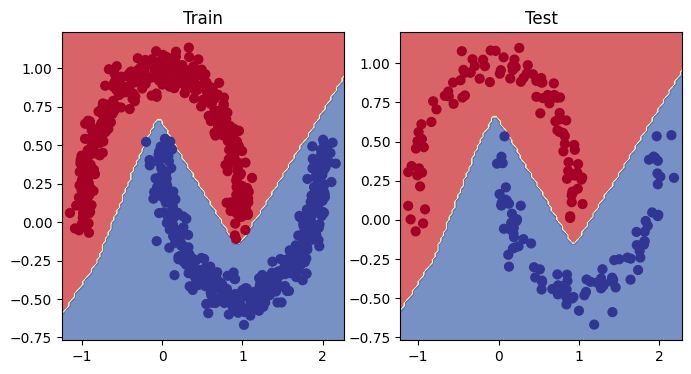

In [128]:
# Plot decision boundary of the model
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_exercise, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_exercise, X_test, y_test)

#### 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

* Feel free to reference the ML cheatsheet website for the formula: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh

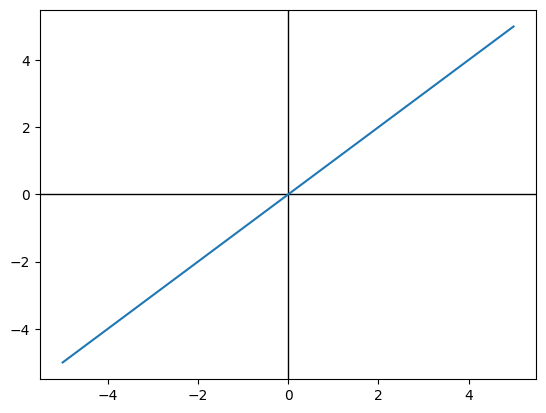

In [161]:
tensor_A = torch.arange(-5, 5, 0.001)
y = tensor_A
plt.axhline(0, color='black', linewidth=1)  # X axis
plt.axvline(0, color='black', linewidth=1)  # Y axis
plt.plot(tensor_A.numpy(), y.numpy())
plt.show()

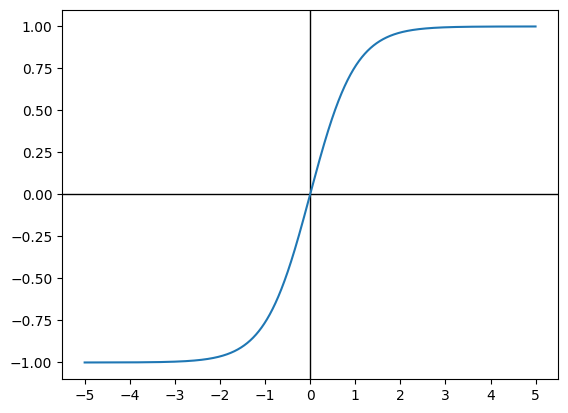

In [164]:
plt.axhline(0, color='black', linewidth=1)  # X axis
plt.axvline(0, color='black', linewidth=1)  # Y axis
y = torch.tanh(tensor_A)
plt.plot(tensor_A.numpy(), y.numpy())
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Tick ogni 1 unità
plt.show()

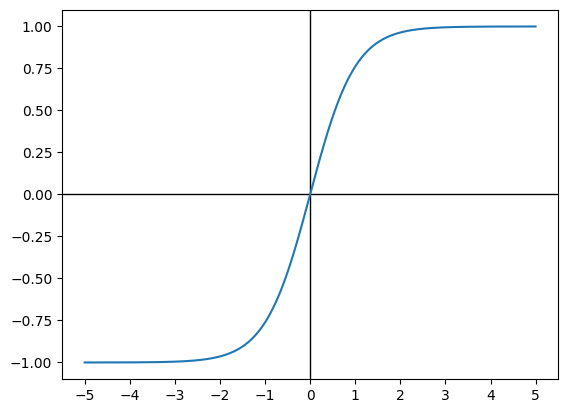

In [165]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.axhline(0, color='black', linewidth=1)  # X axis
plt.axvline(0, color='black', linewidth=1)  # Y axis
y = tanh(tensor_A)
plt.plot(tensor_A.numpy(), y.numpy())
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Tick ogni 1 unità
plt.show()

#### 7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

* Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

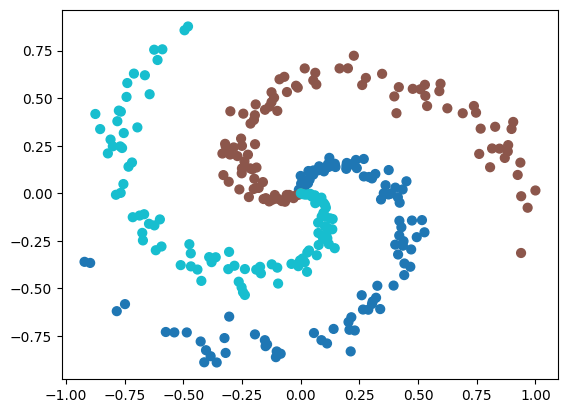

In [167]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="tab10")
plt.show()